# County Redistricting Optimization
This code is setup to compute maps for Georgia at the Block Group Level

Individual cells can be run by hitting shift + enter, or by clicking "Run" a the top.

The main cells that need to be run are the 
- Import lots of functions
- Input settings

Then you can run your choice of optimizing on a single objective, or varying the weights

Later you can choose to plot one of the solutions.

Lastly, we create a plot BVAP/Polsby-Popper for solutions that have been created.



## Import lots of functions - Run this cell first!!

In [1]:
from mcmc_runner import *
from acceptance_functions import *
from argparse import Namespace

ModuleNotFoundError: No module named 'mcmc_runner'

## Create json file from shapefile
This should only need to be run once per dataset.
Ideally, these are already prepared and this never needs to be run.



In [2]:
### These lines are commented since this should not need to be run. 
### Only run if shapefile has not yet been parsed into a json.

#filename = 'sample_data/tl_2010_13_bg10/tl_2010_13_bg10.shp'
#parse_shapefile(filename, no_json=True)

## Input settings - Run this cell!

In [2]:
args = Namespace(accept='mixed_objective_redefined_later', 
                 config_file='example_settings.ini', 
                 data=['sample_data/ga_bg_demographcs.csv GEOID VAP VAP', 
                       'sample_data/ga_bg_demographcs.csv GEOID BVAP BVAP',
                      'sample_data/ga_bg_demographcs.csv GEOID POP POP10'], 
                 districts=14, 
                 geometry='sample_data/ga_tl_2010_13_bg10.json', 
                 #geometry = 'sample_data/tl_2010_13_bg10/tl_2010_13_bg10.shp',  # Prefer not to use .shp here.
                 input_districts=None, 
                 no_json=False, 
                 number_of_runs=3, #25
                 outfolder='outputs/GA', 
                 partition='semi_random_split', 
                 population_tolerance=0.01, 
                 prefix='GA_bg_', 
                 start=3, 
                 steps=10,  #25000
                 summary_file='outputs/GA/GA_summary.csv')

# Run the code

### Option \#1:  Run the code for a single acceptance function
Here you can define the weighting of the acceptance function that you prefer and run the code on that.

In [3]:
# Inputs: Define your choice of acceptance function by choosing bvap_weight and polyby_popper weight

#############
## Inputs  ##
#############

bvap_weight = 1
pp_weight = 1

####################
## Code that runs ###
####################

fixed_prefix = args.prefix
def acceptance(partition):
        return bvap_pp_weights(partition,bvap_weight,pp_weight)
    
args.accept = f"bvap{bvap_weight}_pp{pp_weight}"
args.prefix = fixed_prefix+ f"bvap{bvap_weight}_pp{pp_weight}" 


# Runs the code    
run_the_code(args, acceptance)

# Restores the original prefix
args.prefix = fixed_prefix

Starting run 003
Creating initial partition
Partitioning took 6.970088958740234 seconds
Mean PP: 0.14045502318628802
Starting run 004
Creating initial partition
Partitioning took 7.667466163635254 seconds
Mean PP: 0.1556235639839068
Starting run 005
Creating initial partition
Partitioning took 6.161441087722778 seconds
Mean PP: 0.15596393682848544
Skipped runs: 


### Option \#2: Analyze the runs of the code
This code will create a plot tracking the improvement over the number of steps of the algorithm

Starting run 003
Creating initial partition
Partitioning took 5.141613006591797 seconds
Mean PP: 0.16901347664145808


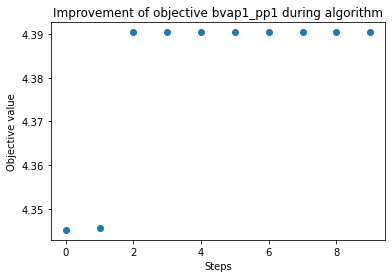

Starting run 004
Creating initial partition
Partitioning took 5.961106777191162 seconds
Mean PP: 0.15035504852029005


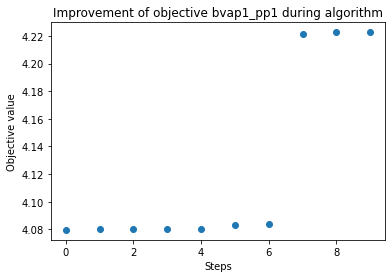

Starting run 005
Creating initial partition
Partitioning took 7.228456020355225 seconds
Mean PP: 0.1562243856833003


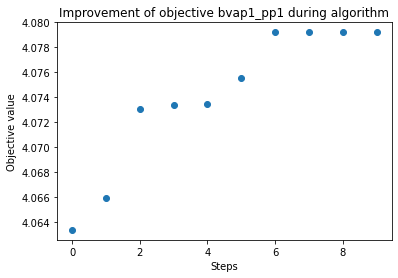

Skipped runs: 


In [4]:
# Inputs: Define your choice of acceptance function by choosing bvap_weight and polyby_popper weight

#############
## Inputs  ##
#############

bvap_weight = 1
pp_weight = 1

####################
## Code that runs ###
####################



# Store the prefix
fixed_prefix = args.prefix

# Create an objective function
def objective(partition):
    return bvap_weight*helper_methods.calculate_black_reps(partition)+ pp_weight*helper_methods.calculate_compactness(partition)

# Accept moves if the objective improves
def acceptance(partition):
        return objective(partition) >= objective(partition.parent)
    
# Change the name of the accepatnce function in the args that will label the output file
args.accept = f"bvap{bvap_weight}_pp{pp_weight}"
args.prefix = fixed_prefix+ f"bvap{bvap_weight}_pp{pp_weight}_track_improvement"    
    
    
# Runs the code    
obj_values = run_the_code_with_objective(args, acceptance, objective)
args.prefix = fixed_prefix


### Option \#3: Run code on list of weights

Gicen the list of weight combinations, it will run the code on each set of weights.

In [12]:
## Inputs:
weights = [[0,1],[1,0],[.75,.25],[.25,.75],[1,1]]

## Code

fixed_prefix = args.prefix
for [bvap_weight,pp_weight] in weights:
    
    # Relabel thenames of the acceptanc function and the prefix 
    # These are just used to store the solution in data files
    args.accept = f"bvap{bvap_weight}_pp{pp_weight}"
    args.prefix = fixed_prefix+f"bvap{bvap_weight}_pp{pp_weight}"
    
    if bvap_weight == 0:
        # only has a compactness objctive
        def acceptance(partition):
            return compactness(partition)
        
    elif pp_weight == 0:
        # only has a bvap objective
        def acceptance(partition):
            return black_representatives(partition)
    else :    
        # Define/Redefine the acceptance function as weighted objective
        def acceptance(partition):
            return bvap_pp_weights(partition,bvap_weight,pp_weight)

    run_the_code(args, acceptance)

Starting run 000
Creating initial partition
Partitioning took 4.905228853225708 seconds
Mean PP: 0.1486594147181107
Starting run 001
Creating initial partition
Partitioning took 6.990086793899536 seconds
Mean PP: 0.17361582698080097
Skipped runs: 
Starting run 000
Creating initial partition
Partitioning took 9.37512993812561 seconds
Mean PP: 0.15918880330365284
Starting run 001
Creating initial partition
Partitioning took 7.285769939422607 seconds
Mean PP: 0.15216815587448027
Skipped runs: 
Starting run 000
Creating initial partition
Partitioning took 8.310334920883179 seconds
Mean PP: 0.15597836209451868
Starting run 001
Creating initial partition
Partitioning took 7.229106903076172 seconds
Mean PP: 0.1647792963400887
Skipped runs: 
Starting run 000
Creating initial partition
Partitioning took 6.135644912719727 seconds
Mean PP: 0.1767300436059139
Starting run 001
Creating initial partition
Partitioning took 5.970034122467041 seconds
Mean PP: 0.17840147100320133
Skipped runs: 
Starting

## Plotting a map

You can use the following cell to plot a map. 

Inputs:  
- shape_file: this is the path to the shapefile that you want to plot
- csv_file: this is the solution that you want to plot
- fig_out_filename: this will save the plot to this location.  You can save a many different filetypes (eg. png, jpeg, pdf)


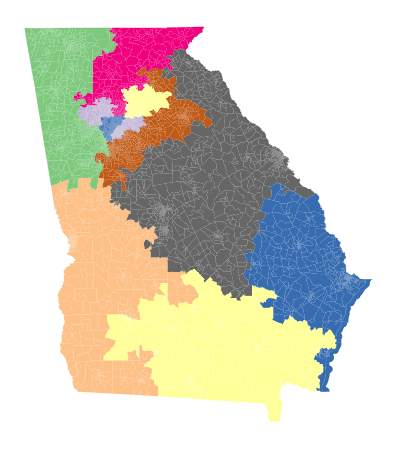

In [2]:
from plot_map import *

args_plot = Namespace(shape_file = 'sample_data/tl_2010_13_bg10/tl_2010_13_bg10.shp',
                      csv_file = 'outputs/GA/block_group_bvap1_pp1_0.01k_00.csv',
                      fig_out_type = 'pdf')

plot_map_basic(args_plot)


## Plot map with calculations  (Under construction!!!)

Warning!  This is under construction!!

To do:
- create output .json file from mcmc runner that records data for each district
- link .json file to the plot data and plot it. 
- Add a title to the plot as well

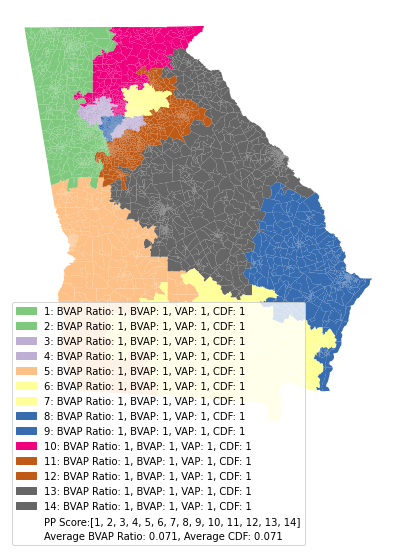

In [3]:
from plot_map import *

args_plot = Namespace(shape_file = 'sample_data/tl_2010_13_bg10/tl_2010_13_bg10.shp',
                      csv_file = 'outputs/GA/block_group_bvap1_pp1_0.01k_00.csv',
                      fig_out_type = 'pdf')

plot_map_data(args_plot)

# Creating Pareto Curve Plot
This function takes in data from the summary csv and plots it in a scatter plot.  Each data point can be clicked to see what the values are for that solution.



In [30]:


state_code = 'GA'
block_level = 'Block Group'
summary_file = 'outputs/GA/GA_summary.csv'

import comparison_plotting as cp
df_summary = cp.comparison_plot_bvap_pp(summary_file, state_code, block_level)

df_summary

KeyError: 'black_reps'

In [11]:
## You may need to run one of these two installs to get the plot to create
#pip install plotly
#conda install plotly

#### Todo:
- package all of this up into a single function call with the summary file as the argument

In [15]:
df_summary

,outfile_name,acceptance,number_of_districts,pop_tolerance,polsby_popper,mean_BVAP,black_reps
0,block_group_bvap0_pp1_0.01k_00.csv,bvap0_pp1,14,0.01,0.150,0.291,4.30
1,block_group_bvap0_pp1_0.01k_01.csv,bvap0_pp1,14,0.01,0.155,0.291,4.07
2,block_group_bvap0_pp1bvap1_pp0_0.01k_00.csv,bvap1_pp0,14,0.01,0.125,0.291,4.03
3,block_group_bvap0_pp1bvap1_pp0_0.01k_01.csv,bvap1_pp0,14,0.01,0.174,0.291,4.29
4,block_group_bvap0_pp1bvap1_pp0bvap0.75_pp0.25_...,bvap0.75_pp0.25,14,0.01,0.159,0.291,4.26
5,block_group_bvap0_pp1bvap1_pp0bvap0.75_pp0.25_...,bvap0.75_pp0.25,14,0.01,0.148,0.291,4.16
6,block_group_bvap0_pp1bvap1_pp0bvap0.75_pp0.25b...,bvap0.25_pp0.75,14,0.01,0.170,0.292,3.86
7,block_group_bvap0_pp1bvap1_pp0bvap0.75_pp0.25b...,bvap0.25_pp0.75,14,0.01,0.165,0.292,3.65
8,block_group_bvap0_pp1bvap1_pp0bvap0.75_pp0.25b...,bvap1_pp1,14,0.01,0.199,0.291,4.20
9,block_group_bvap0_pp1bvap1_pp0bvap0.75_pp0.25b...,bvap1_pp1,14,0.01,0.174,0.291,4.04


In [26]:
import plotly.express as px

#fig = px.scatter(x=black_reps, y=compact_avg)

fig = px.scatter(df_summary, x="black_reps", y="polsby_popper", hover_data=['outfile_name','pop_tolerance'])
fig.update_layout(title=f'{state_code.upper()} {block_level.capitalize()} Level Compactness vs. Black Representation',
                    xaxis_title="Expected Black Representatives",
                    yaxis_title="Mean Polsby Popper Score")
# Create an interactive plot
fig.write_html(f"outputs/{state_code}/{state_code}_{block_level}_comparison.html")
fig.show()

df_summary # display the data (you could also just open the .csv file in excel if you want to look at it)

,outfile_name,acceptance,number_of_districts,pop_tolerance,polsby_popper,mean_BVAP,black_reps
0,block_group_bvap0_pp1_0.01k_00.csv,bvap0_pp1,14,0.01,0.150,0.291,4.30
1,block_group_bvap0_pp1_0.01k_01.csv,bvap0_pp1,14,0.01,0.155,0.291,4.07
2,block_group_bvap0_pp1bvap1_pp0_0.01k_00.csv,bvap1_pp0,14,0.01,0.125,0.291,4.03
3,block_group_bvap0_pp1bvap1_pp0_0.01k_01.csv,bvap1_pp0,14,0.01,0.174,0.291,4.29
4,block_group_bvap0_pp1bvap1_pp0bvap0.75_pp0.25_...,bvap0.75_pp0.25,14,0.01,0.159,0.291,4.26
5,block_group_bvap0_pp1bvap1_pp0bvap0.75_pp0.25_...,bvap0.75_pp0.25,14,0.01,0.148,0.291,4.16
6,block_group_bvap0_pp1bvap1_pp0bvap0.75_pp0.25b...,bvap0.25_pp0.75,14,0.01,0.170,0.292,3.86
7,block_group_bvap0_pp1bvap1_pp0bvap0.75_pp0.25b...,bvap0.25_pp0.75,14,0.01,0.165,0.292,3.65
8,block_group_bvap0_pp1bvap1_pp0bvap0.75_pp0.25b...,bvap1_pp1,14,0.01,0.199,0.291,4.20
9,block_group_bvap0_pp1bvap1_pp0bvap0.75_pp0.25b...,bvap1_pp1,14,0.01,0.174,0.291,4.04


In [22]:
import plotly.graph_objects as go

import numpy as np
np.random.seed(1)

x = np.random.rand(100)
y = np.random.rand(100)

f = go.FigureWidget([go.Scatter(x=x, y=y, mode='markers')])

scatter = f.data[0]
colors = ['#a3a7e4'] * 100
scatter.marker.color = colors
scatter.marker.size = [10] * 100
f.layout.hovermode = 'closest'


# create our callback function
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 20
        with f.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s


scatter.on_click(update_point)
f

FigureWidget({
    'data': [{'marker': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
               …

# Clustering Plot
This will create a cluster plot of all the solutions computed and show which are the most representative solutions.



In [ ]:
......


# Draw a solution as a graph
This will draw a particular solution as a graph of nodes and edges.

In [ ]:
......